In [11]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

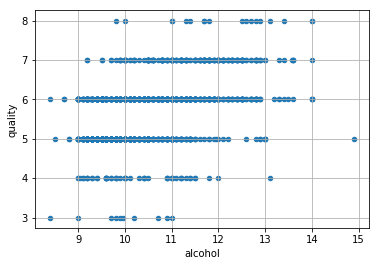

In [13]:
data = pd.read_table(url, sep=";")
data.head()
data.describe()
data.plot(kind="scatter", x="alcohol", y="quality", grid=True)
plt.show()

In [15]:
#train model
def ols_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [16]:
def gradientDescent(X, y, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = ols_cost(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = ols_cost(X, y, theta)
        
    return theta, cost

In [17]:
data.describe()
X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']

In [18]:
X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']

In [19]:
X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

In [20]:
print(X.shape, y.shape, theta.shape)

(1599, 2) (1599, 1) (1, 2)


In [21]:
ols_cost(X, y, theta)

16.20825515947467

In [22]:
alpha = 0.01
iters = 1000

In [23]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)

In [24]:
ols_cost(X, y, theta_final)

0.2660076719790539

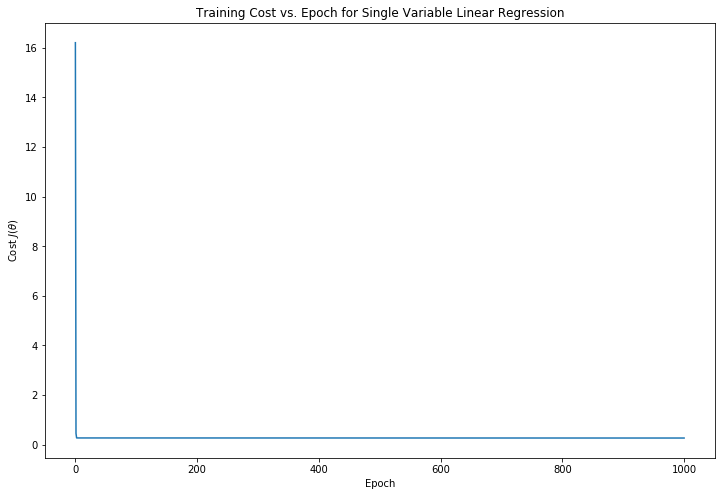

In [25]:
plt.figure(figsize=(12,8))
plt.xlabel("Epoch")
plt.ylabel(r"Cost $J(\theta$)")
plt.plot(cost)
plt.title("Training Cost vs. Epoch for Single Variable Linear Regression")
plt.show()

In [26]:
x = np.linspace(data.alcohol.min(), data.alcohol.max(), 100)
y_hat = theta_final[0,1] + theta_final[0,0] * x 

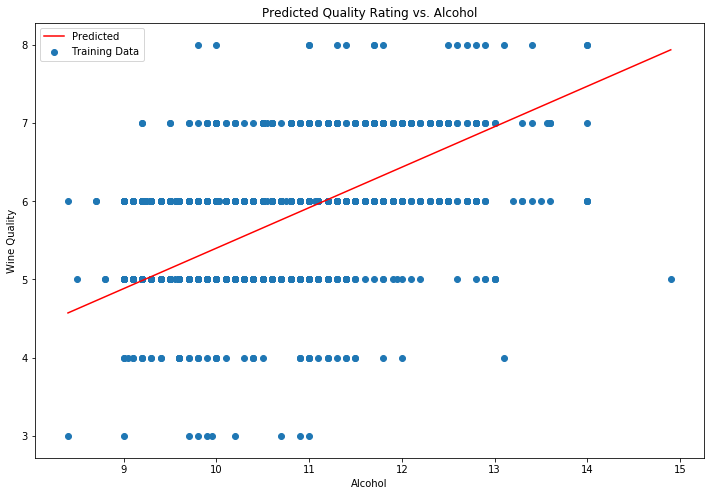

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, y_hat, 'r', label='Predicted')
ax.scatter(data.alcohol, data.quality, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Alcohol')
ax.set_ylabel('Wine Quality')
ax.set_title('Predicted Quality Rating vs. Alcohol')
plt.show()